In [53]:
import scipy.fftpack as sf
from scipy.signal import savgol_filter

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
subject_number = 'Subject Number'
age = 'Age (Years)'
gender = 'Gender'
height = 'Reported Height (cm)'
weight = 'Reported Weight (kg)'
shoe_size = 'Shoe Size NL'

#measurements
waist = 'Waist Circumference, Pref (mm)'
neck='Neck Base Circumference (mm)'
hip= 'Hip Circumference, Maximum (mm)'
chest='Chest Circumference (mm)'
crotch_height='Crotch Height (mm)'
shoe_size_italy="Shoe Size IT"

In [124]:
demographic=[subject_number,gender,age, height, weight, shoe_size,pants_size]
mearuments=[subject_number,waist,neck,chest,hip,crotch_height]
italy_demographic=[subject_number,gender,age, height, weight, shoe_size_italy,pants_size]
demographic_path = "./dutch/demographic_metric.csv"
measurement_path = "./dutch/measurement_metric.csv"
M_data=pd.read_csv(measurement_path,skipinitialspace=True)

In [125]:
italy_demographic_path="./italy/ItalyDemographics_csv.csv"
italy_measurement_path="./italy/ItalyMeasurements_csv.csv"


In [126]:
demographic_data=pd.read_csv(demographic_path,skipinitialspace=True,usecols=demographic)
measurement_data=pd.read_csv(measurement_path,skipinitialspace=True,usecols=mearuments)
measurement_data=measurement_data[[subject_number,waist,chest,neck,hip,crotch_height]]
demographic_data=demographic_data.loc[demographic_data[gender]=='Male'] #shape  Male (567,6) Female (700,6)

data = demographic_data.merge(measurement_data, on=subject_number, how='left') #shape (567, *)

# data = data.drop(subject_number, axis=1)

data=data.drop(gender,axis=1)


In [127]:
data.head()

,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,Pants Size Waist,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm)
0,11012,24,206.00,110.00,47,36,916.0,1004.0,506.0,1091.0,1005.0
1,11024,32,184.00,100.00,45,34,867.0,1099.0,482.0,1090.0,890.0
2,11025,56,187.00,82.00,44,33,886.0,983.0,492.0,966.0,856.0
3,11029,60,178.00,98.00,43,38,1036.0,1153.0,500.0,1056.0,797.0
4,11033,33,184.00,85.00,43,34,930.0,1021.0,575.0,NaN,831.0


ITALY data merge / ALL MALES

In [128]:

italy_demographic_data=pd.read_csv(italy_demographic_path,skipinitialspace=True,usecols=italy_demographic)
italy_measurement_data=pd.read_csv(italy_measurement_path,skipinitialspace=True,usecols=mearuments)
italy_measurement_data=italy_measurement_data[[subject_number,waist,chest,neck,hip,crotch_height]]
italy_demographic_data=italy_demographic_data.loc[italy_demographic_data[gender]=='Male'] 

italy_demographic_data.columns=[subject_number,age,gender,height,weight,shoe_size,pants_size]
italy_data=italy_demographic_data.merge(italy_measurement_data,on=subject_number,how='left')

#italy_data=italy_data.drop(subject_number,axis=1)
italy_data=italy_data.drop(gender,axis=1)
italy_data.head()


,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,Pants Size Waist,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm)
0,4000,30.5,172.0,72.0,41.0,Don't Know,826.0,965.0,490.0,930.0,794.0
1,4001,30.3,175.0,72.0,42.0,Don't Know,814.0,936.0,478.0,967.0,797.0
2,4004,18.1,179.0,67.0,41.0,35.4,787.0,917.0,470.0,940.0,849.0
3,4007,38.0,178.0,76.0,41.5,Don't Know,888.0,1050.0,505.0,1002.0,808.0
4,4011,18.5,173.0,71.0,43.0,29.5 or Smaller,786.0,967.0,504.0,888.0,752.0


In [129]:
print(italy_data.shape)
print(data.shape)

(413, 11)
(567, 11)


In [130]:
data[height]


0      206.00
1      184.00
2      187.00
3      178.00
4      184.00
        ...  
562    169.00
563    180.00
564    180.00
565    193.00
566    180.00
Name: Reported Height (cm), Length: 567, dtype: object

italy shape( 801,9)
dutch shape(567,9)

In [131]:
data.dropna(axis=0,how='any',inplace=True) # shape (564,*)
data=data[data[height].str.contains("No Response")==False]
data = data[data[weight].str.contains("No Response") == False]
data = data[data[shoe_size].str.contains("No Response") == False]
total_features=data.shape[1]-1

In [132]:
data = data[data[pants_size].str.contains("No Response") == False]

In [133]:
print(italy_data[weight].dtype)
print(data[weight].dtype)

float64
object


In [134]:
italy_data=italy_data[italy_data[shoe_size].str.contains("44 or Larger|35 or Smaller")==False]
italy_data=italy_data[italy_data[pants_size].str.contains("Don't Know|29.5 or Smaller|63 or Larger")==False]
italy_data = italy_data[italy_data[pants_size].str.contains("No Response") == False]
italy_data.dropna(axis=0,how='any',inplace=True)

In [135]:
italy_data[shoe_size]=pd.to_numeric(italy_data[shoe_size])
italy_data[pants_size]=pd.to_numeric(italy_data[pants_size])
italy_data.dtypes


Subject Number                       int64
Age (Years)                        float64
Reported Height (cm)               float64
Reported Weight (kg)               float64
Shoe Size NL                       float64
Pants Size Waist                   float64
Waist Circumference, Pref (mm)     float64
Chest Circumference (mm)           float64
Neck Base Circumference (mm)       float64
Hip Circumference, Maximum (mm)    float64
Crotch Height (mm)                 float64
dtype: object

In [136]:
data.head()

,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,Pants Size Waist,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm)
0,11012,24,206.00,110.00,47,36,916.0,1004.0,506.0,1091.0,1005.0
1,11024,32,184.00,100.00,45,34,867.0,1099.0,482.0,1090.0,890.0
2,11025,56,187.00,82.00,44,33,886.0,983.0,492.0,966.0,856.0
3,11029,60,178.00,98.00,43,38,1036.0,1153.0,500.0,1056.0,797.0
8,11072,36,183.00,92.00,44,34,1003.0,1051.0,498.0,1095.0,828.0


In [137]:
features = data.columns.tolist()

target = features[-5:] #get last column

    #features = list(set(features) - set([target]))
features = features[:-5]
data[height] = pd.to_numeric(data[height])
data[weight]=pd.to_numeric(data[weight])
data[shoe_size]=pd.to_numeric(data[shoe_size])
data[pants_size]=pd.to_numeric(data[pants_size])

In [138]:
# print(data.shape)
# frames=[data,italy_data]
# result=pd.concat(frames)
# print(italy_data.shape)

In [139]:
data.head()

,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,Pants Size Waist,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm)
0,11012,24,206.0,110.0,47.0,36,916.0,1004.0,506.0,1091.0,1005.0
1,11024,32,184.0,100.0,45.0,34,867.0,1099.0,482.0,1090.0,890.0
2,11025,56,187.0,82.0,44.0,33,886.0,983.0,492.0,966.0,856.0
3,11029,60,178.0,98.0,43.0,38,1036.0,1153.0,500.0,1056.0,797.0
8,11072,36,183.0,92.0,44.0,34,1003.0,1051.0,498.0,1095.0,828.0


In [140]:
data[waist]=data[waist]/25.4#convert to inches

In [141]:
print(data[waist],data[pants_size])

0      36.062992
1      34.133858
2      34.881890
3      40.787402
8      39.488189
         ...    
560    28.228346
561    32.362205
564    34.960630
565    33.779528
566    32.913386
Name: Waist Circumference, Pref (mm), Length: 390, dtype: float64 0      36
1      34
2      33
3      38
8      34
       ..
560    30
561    33
564    32
565    32
566    32
Name: Pants Size Waist, Length: 390, dtype: int64


In [142]:
italy_data[waist]=italy_data[waist]/25.4

In [143]:
combined_data=pd.concat([data,italy_data])
combined_data.shape

(671, 11)

In [144]:
# plt.figure(figsize=(10,10))

# X=italy_data[pants_size]
# X=savgol_filter(X, 81, 3)
# Y=italy_data[waist]
# Y=savgol_filter(Y, 81, 3)
# plt.plot(X,label="Reported Waist")
# plt.plot(Y,label="Measured Waist")
# plt.legend()
# plt.show()


In [99]:

from cProfile import label
# plt.figure(figsize=(10,10))

# X=data[pants_size]
# X=savgol_filter(X, 81, 3)
# Y=data[waist]
# Y=savgol_filter(Y, 81, 3)
# plt.plot(X,label="Reported Waist")
# plt.plot(Y,label="Measured Waist")
# plt.legend()
# plt.show()

NameError: name 'savgol_filter' is not defined

<Figure size 720x720 with 0 Axes>

In [100]:
demographic_data.head()

,Subject Number,Age (Years),Gender,Reported Height (cm),Reported Weight (kg),Shoe Size NL,Pants Size Waist
3,11012,24,Male,206.00,110.00,47,36
6,11024,32,Male,184.00,100.00,45,34
7,11025,56,Male,187.00,82.00,44,33
10,11029,60,Male,178.00,98.00,43,38
12,11033,33,Male,184.00,85.00,43,34


In [101]:

plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn',linewidths=2,linecolor='orange',annot_kws={'size':8,'color':'black'},fmt='.4f',square=True)

TypeError: corr() missing 1 required positional argument: 'other'

<Figure size 1080x1080 with 0 Axes>

In [102]:

plt.figure(figsize=(15,15))
sns.heatmap(y.corr(),annot=True,cmap='RdYlGn',linewidths=2,linecolor='orange',annot_kws={'size':8,'color':'black'},fmt='.4f',square=True)

NameError: name 'y' is not defined

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

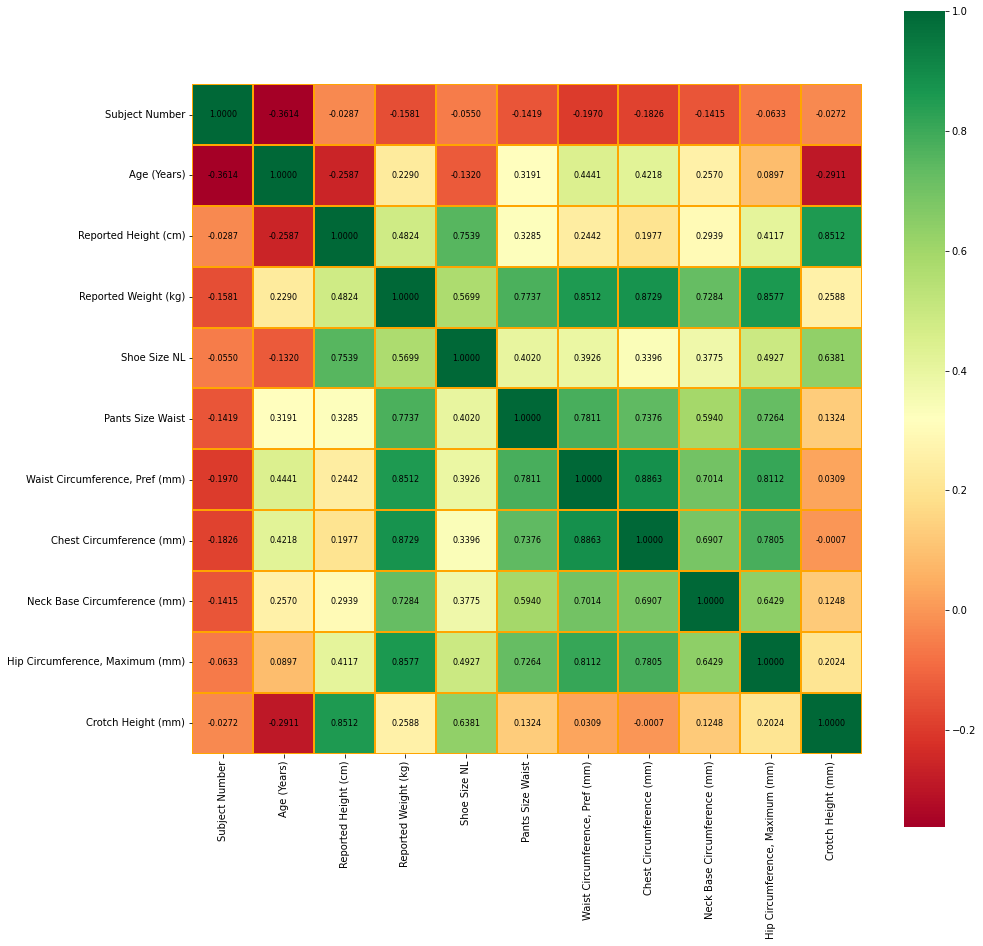

In [103]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=2,linecolor='orange',annot_kws={'size':8,'color':'black'},fmt='.4f',square=True)

In [104]:
data.shape

(390, 11)

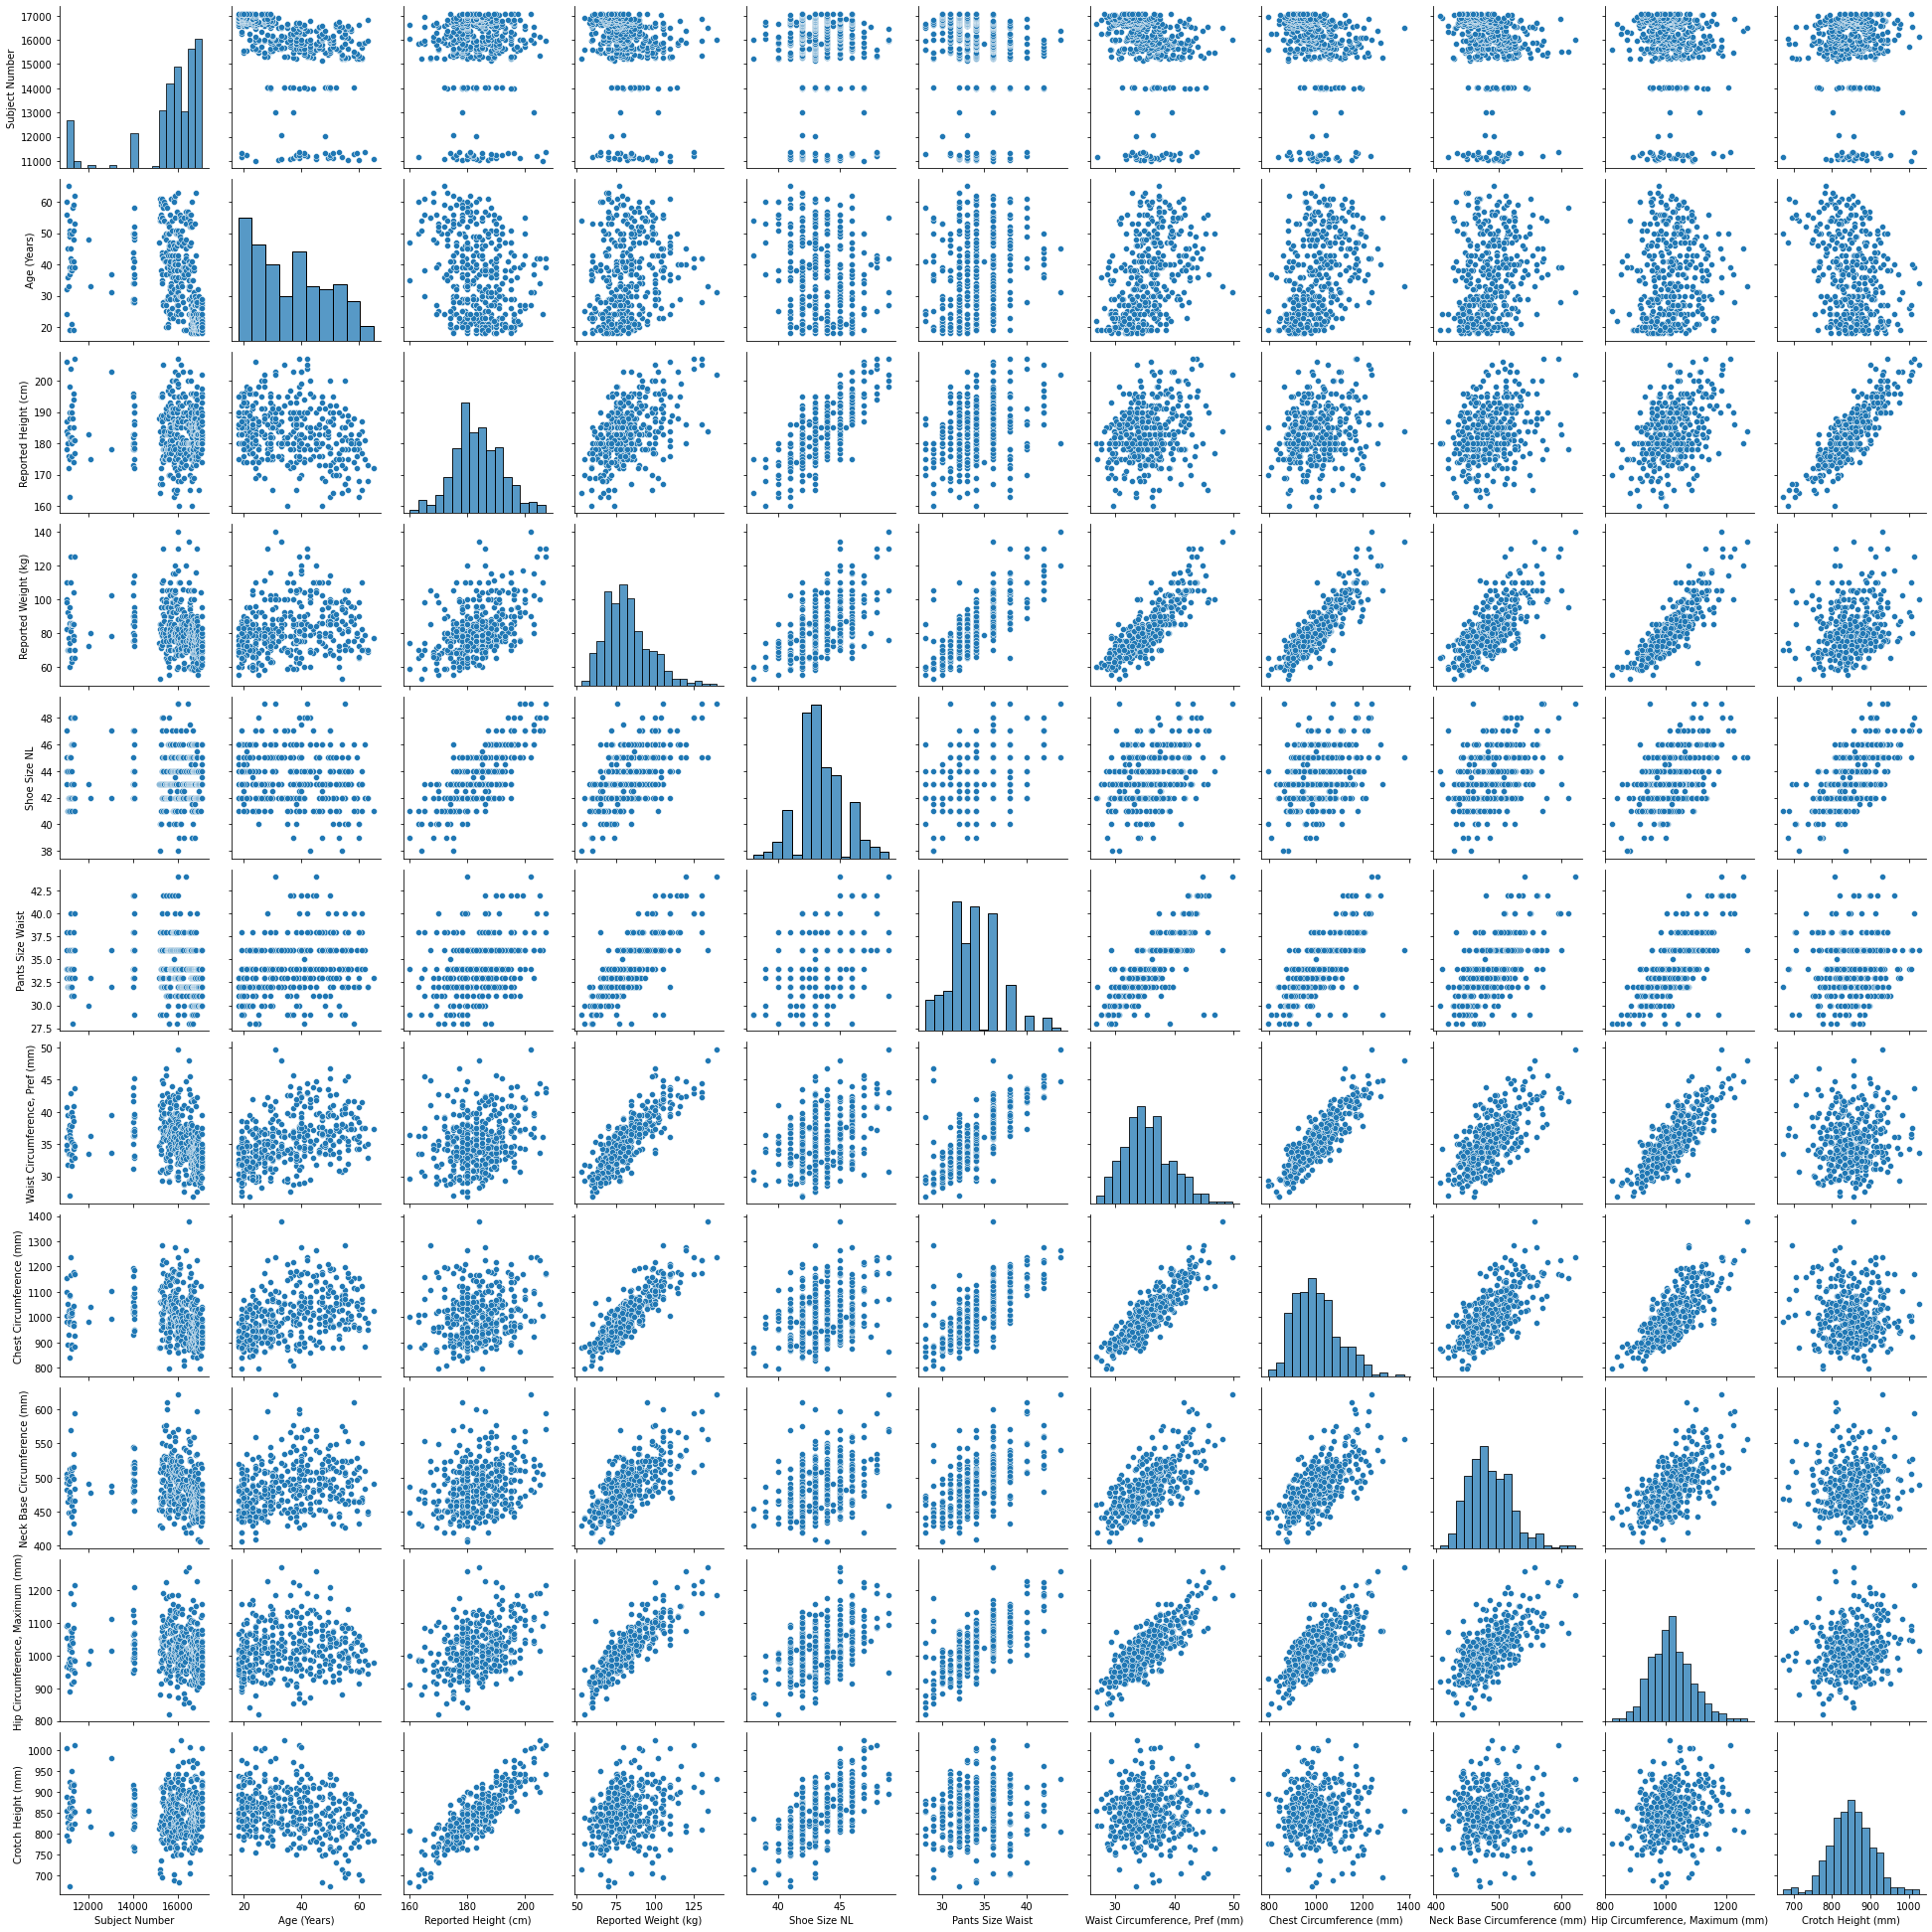

In [105]:
sns.pairplot(data)

In [106]:
import numpy as np  #np is shortcut of numpy

#Syntax : np.random.randint(the range for ex if you choose 100 then your array elements will be within the range 0 to 100, size = (row size, col size)

a = np.random.randint(100, size = (10,5)) #a is a variable(object)
print(a)

[[33 79 67 49 59]
 [ 0 45  1 12 77]
 [33 65  5 29 47]
 [76 22 76 64 40]
 [36 13 98 39 81]
 [37 37  8 97  8]
 [42 38  0  9 50]
 [ 5 51 65 51 54]
 [44 60 74 87 91]
 [69 10 78 83 46]]


In [107]:
a[:,0]

array([33,  0, 33, 76, 36, 37, 42,  5, 44, 69])

In [108]:
a=[[1012.0, 715.0, 997.0, 466.0, 865.0], [940.0, 762.0, 940.0, 460.0, 790.0], [902.0, 888.0, 969.0, 482.0, 857.0], [941.0, 931.0, 1041.0, 460.0, 846.0], [855.0, 779.0, 942.0, 462.0, 742.0], [923.0, 899.0, 1009.0, 442.0, 844.0], [888.0, 760.0, 911.0, 481.0, 805.0], [1195.0, 770.0, 1065.0, 496.0, 1082.0], [1168.0, 843.0, 1075.0, 569.0, 1009.0], [1036.0, 804.0, 996.0, 487.0, 857.0], [964.0, 946.0, 1068.0, 442.0, 881.0], [1210.0, 912.0, 1122.0, 494.0, 1080.0], [911.0, 858.0, 942.0, 466.0, 828.0], [885.0, 842.0, 947.0, 488.0, 776.0], [1068.0, 794.0, 1063.0, 484.0, 935.0], [981.0, 795.0, 985.0, 460.0, 796.0], [888.0, 908.0, 918.0, 478.0, 792.0], [863.0, 815.0, 913.0, 452.0, 802.0], [851.0, 780.0, 871.0, 447.0, 701.0], [1020.0, 744.0, 973.0, 460.0, 915.0], [1024.0, 826.0, 975.0, 495.0, 837.0], [897.0, 769.0, 942.0, 459.0, 816.0], [916.0, 876.0, 964.0, 442.0, 840.0], [1031.0, 764.0, 1004.0, 496.0, 904.0], [892.0, 932.0, 953.0, 441.0, 836.0], [976.0, 778.0, 996.0, 503.0, 908.0], [978.0, 770.0, 945.0, 475.0, 820.0], [796.0, 896.0, 931.0, 449.0, 724.0], [922.0, 877.0, 980.0, 449.0, 798.0], [808.0, 777.0, 853.0, 450.0, 727.0], [1156.0, 778.0, 1072.0, 526.0, 1022.0], [1014.0, 855.0, 1063.0, 488.0, 931.0], [980.0, 820.0, 947.0, 465.0, 790.0], [1016.0, 771.0, 954.0, 455.0, 966.0], [952.0, 782.0, 979.0, 488.0, 876.0], [927.0, 826.0, 949.0, 466.0, 835.0], [880.0, 816.0, 919.0, 452.0, 756.0], [854.0, 755.0, 897.0, 458.0, 734.0], [893.0, 843.0, 927.0, 489.0, 754.0], [924.0, 723.0, 997.0, 448.0, 777.0], [914.0, 789.0, 919.0, 460.0, 780.0], [1072.0, 764.0, 1073.0, 486.0, 957.0], [898.0, 798.0, 952.0, 482.0, 774.0], [1071.0, 905.0, 1110.0, 496.0, 961.0], [830.0, 791.0, 867.0, 455.0, 703.0], [956.0, 818.0, 996.0, 467.0, 851.0], [1087.0, 771.0, 1015.0, 475.0, 985.0], [1044.0, 797.0, 1043.0, 465.0, 892.0], [843.0, 855.0, 840.0, 460.0, 683.0], [1157.0, 706.0, 1086.0, 554.0, 1158.0], [928.0, 844.0, 982.0, 465.0, 894.0], [992.0, 876.0, 1000.0, 490.0, 929.0], [1100.0, 869.0, 1080.0, 547.0, 1041.0], [980.0, 868.0, 957.0, 492.0, 854.0], [947.0, 794.0, 1033.0, 476.0, 847.0], [954.0, 766.0, 1080.0, 468.0, 923.0], [1048.0, 794.0, 987.0, 503.0, 899.0], [890.0, 758.0, 910.0, 497.0, 747.0], [926.0, 819.0, 955.0, 445.0, 845.0], [905.0, 820.0, 1017.0, 490.0, 816.0], [925.0, 776.0, 905.0, 469.0, 772.0], [1255.0, 1030.0, 1166.0, 523.0, 1107.0], [963.0, 809.0, 1089.0, 512.0, 851.0], [981.0, 811.0, 1069.0, 478.0, 873.0], [938.0, 848.0, 1045.0, 449.0, 860.0], [950.0, 886.0, 960.0, 485.0, 791.0], [797.0, 769.0, 811.0, 436.0, 754.0], [1027.0, 790.0, 993.0, 455.0, 865.0], [1022.0, 865.0, 961.0, 480.0, 806.0], [912.0, 787.0, 848.0, 435.0, 693.0], [1053.0, 787.0, 1042.0, 486.0, 945.0], [1029.0, 767.0, 843.0, 469.0, 887.0], [1042.0, 812.0, 955.0, 486.0, 920.0], [945.0, 847.0, 972.0, 456.0, 820.0], [985.0, 772.0, 1087.0, 493.0, 914.0], [906.0, 851.0, 923.0, 434.0, 806.0], [976.0, 850.0, 1023.0, 491.0, 1009.0], [1011.0, 886.0, 1057.0, 502.0, 896.0], [940.0, 902.0, 1053.0, 487.0, 850.0], [1057.0, 800.0, 1041.0, 462.0, 1041.0], [1059.0, 801.0, 994.0, 485.0, 917.0], [1042.0, 847.0, 1021.0, 511.0, 928.0], [961.0, 815.0, 955.0, 490.0, 807.0], [865.0, 795.0, 934.0, 480.0, 795.0], [1219.0, 857.0, 1225.0, 577.0, 1160.0], [1055.0, 806.0, 1042.0, 496.0, 916.0], [1171.0, 890.0, 1051.0, 520.0, 1000.0], [921.0, 723.0, 972.0, 485.0, 791.0], [990.0, 728.0, 945.0, 497.0, 752.0], [1029.0, 806.0, 993.0, 516.0, 958.0], [1019.0, 889.0, 1066.0, 490.0, 927.0], [981.0, 787.0, 963.0, 505.0, 877.0], [970.0, 829.0, 1020.0, 470.0, 827.0], [1065.0, 714.0, 1160.0, 486.0, 990.0], [959.0, 862.0, 966.0, 455.0, 820.0], [930.0, 802.0, 994.0, 454.0, 830.0], [996.0, 944.0, 954.0, 482.0, 832.0], [946.0, 837.0, 1003.0, 475.0, 814.0], [964.0, 887.0, 1072.0, 419.0, 767.0], [884.0, 780.0, 947.0, 476.0, 805.0], [1043.0, 857.0, 954.0, 451.0, 870.0], [1059.0, 892.0, 1035.0, 537.0, 972.0], [983.0, 963.0, 1078.0, 535.0, 950.0], [934.0, 887.0, 1030.0, 453.0, 787.0], [978.0, 910.0, 978.0, 455.0, 852.0], [1054.0, 885.0, 1072.0, 500.0, 920.0], [890.0, 772.0, 930.0, 465.0, 799.0], [1015.0, 871.0, 985.0, 482.0, 891.0], [981.0, 745.0, 990.0, 462.0, 908.0], [1033.0, 871.0, 1003.0, 507.0, 915.0], [1012.0, 793.0, 978.0, 484.0, 905.0], [900.0, 767.0, 970.0, 475.0, 797.0], [963.0, 871.0, 972.0, 485.0, 878.0], [866.0, 845.0, 920.0, 465.0, 809.0], [947.0, 754.0, 1012.0, 439.0, 887.0], [949.0, 907.0, 1023.0, 467.0, 857.0], [923.0, 768.0, 966.0, 460.0, 766.0], [1052.0, 1026.0, 1014.0, 489.0, 856.0], [1190.0, 886.0, 1075.0, 527.0, 1005.0], [1177.0, 876.0, 1122.0, 567.0, 1082.0], [967.0, 752.0, 888.0, 504.0, 786.0], [950.0, 773.0, 987.0, 478.0, 863.0], [1030.0, 761.0, 970.0, 423.0, 840.0], [908.0, 835.0, 974.0, 466.0, 813.0], [966.0, 854.0, 933.0, 480.0, 785.0], [1010.0, 681.0, 1065.0, 485.0, 992.0], [895.0, 835.0, 920.0, 436.0, 760.0], [1000.0, 702.0, 980.0, 452.0, 907.0], [1213.0, 804.0, 1091.0, 583.0, 1182.0], [981.0, 710.0, 925.0, 470.0, 858.0], [1016.0, 876.0, 1022.0, 488.0, 822.0], [882.0, 866.0, 969.0, 486.0, 764.0]]
print(len(a))


132


In [109]:
target=[[921.0, 723.0, 972.0, 485.0, 791.0], [1190.0, 886.0, 1075.0, 527.0, 1005.0], [1043.0, 857.0, 954.0, 451.0, 870.0], [1156.0, 778.0, 1072.0, 526.0, 1022.0], [1036.0, 804.0, 996.0, 487.0, 857.0], [981.0, 795.0, 985.0, 460.0, 796.0], [956.0, 818.0, 996.0, 467.0, 851.0], [1012.0, 715.0, 997.0, 466.0, 865.0], [863.0, 815.0, 913.0, 452.0, 802.0], [938.0, 848.0, 1045.0, 449.0, 860.0], [797.0, 769.0, 811.0, 436.0, 754.0], [1055.0, 806.0, 1042.0, 496.0, 916.0], [1010.0, 681.0, 1065.0, 485.0, 992.0], [830.0, 791.0, 867.0, 455.0, 703.0], [1015.0, 871.0, 985.0, 482.0, 891.0], [961.0, 815.0, 955.0, 490.0, 807.0], [964.0, 946.0, 1068.0, 442.0, 881.0], [992.0, 876.0, 1000.0, 490.0, 929.0], [941.0, 931.0, 1041.0, 460.0, 846.0], [930.0, 802.0, 994.0, 454.0, 830.0], [865.0, 795.0, 934.0, 480.0, 795.0], [888.0, 760.0, 911.0, 481.0, 805.0], [1000.0, 702.0, 980.0, 452.0, 907.0], [976.0, 850.0, 1023.0, 491.0, 1009.0], [981.0, 787.0, 963.0, 505.0, 877.0], [1016.0, 771.0, 954.0, 455.0, 966.0], [923.0, 768.0, 966.0, 460.0, 766.0], [983.0, 963.0, 1078.0, 535.0, 950.0], [1195.0, 770.0, 1065.0, 496.0, 1082.0], [1100.0, 869.0, 1080.0, 547.0, 1041.0], [963.0, 871.0, 972.0, 485.0, 878.0], [996.0, 944.0, 954.0, 482.0, 832.0], [947.0, 754.0, 1012.0, 439.0, 887.0], [926.0, 819.0, 955.0, 445.0, 845.0], [855.0, 779.0, 942.0, 462.0, 742.0], [1016.0, 876.0, 1022.0, 488.0, 822.0], [927.0, 826.0, 949.0, 466.0, 835.0], [1068.0, 794.0, 1063.0, 484.0, 935.0], [981.0, 745.0, 990.0, 462.0, 908.0], [1019.0, 889.0, 1066.0, 490.0, 927.0], [1157.0, 706.0, 1086.0, 554.0, 1158.0], [1052.0, 1026.0, 1014.0, 489.0, 856.0], [990.0, 728.0, 945.0, 497.0, 752.0], [888.0, 908.0, 918.0, 478.0, 792.0], [1012.0, 793.0, 978.0, 484.0, 905.0], [925.0, 776.0, 905.0, 469.0, 772.0], [1033.0, 871.0, 1003.0, 507.0, 915.0], [905.0, 820.0, 1017.0, 490.0, 816.0], [897.0, 769.0, 942.0, 459.0, 816.0], [1011.0, 886.0, 1057.0, 502.0, 896.0], [1027.0, 790.0, 993.0, 455.0, 865.0], [892.0, 932.0, 953.0, 441.0, 836.0], [952.0, 782.0, 979.0, 488.0, 876.0], [890.0, 772.0, 930.0, 465.0, 799.0], [978.0, 770.0, 945.0, 475.0, 820.0], [843.0, 855.0, 840.0, 460.0, 683.0], [947.0, 794.0, 1033.0, 476.0, 847.0], [980.0, 820.0, 947.0, 465.0, 790.0], [1168.0, 843.0, 1075.0, 569.0, 1009.0], [898.0, 798.0, 952.0, 482.0, 774.0], [945.0, 847.0, 972.0, 456.0, 820.0], [1171.0, 890.0, 1051.0, 520.0, 1000.0], [890.0, 758.0, 910.0, 497.0, 747.0], [940.0, 762.0, 940.0, 460.0, 790.0], [808.0, 777.0, 853.0, 450.0, 727.0], [1213.0, 804.0, 1091.0, 583.0, 1182.0], [1020.0, 744.0, 973.0, 460.0, 915.0], [902.0, 888.0, 969.0, 482.0, 857.0], [923.0, 899.0, 1009.0, 442.0, 844.0], [1057.0, 800.0, 1041.0, 462.0, 1041.0], [895.0, 835.0, 920.0, 436.0, 760.0], [966.0, 854.0, 933.0, 480.0, 785.0], [900.0, 767.0, 970.0, 475.0, 797.0], [796.0, 896.0, 931.0, 449.0, 724.0], [882.0, 866.0, 969.0, 486.0, 764.0], [981.0, 811.0, 1069.0, 478.0, 873.0], [1177.0, 876.0, 1122.0, 567.0, 1082.0], [954.0, 766.0, 1080.0, 468.0, 923.0], [1255.0, 1030.0, 1166.0, 523.0, 1107.0], [940.0, 902.0, 1053.0, 487.0, 850.0], [963.0, 809.0, 1089.0, 512.0, 851.0], [970.0, 829.0, 1020.0, 470.0, 827.0], [1029.0, 767.0, 843.0, 469.0, 887.0], [1059.0, 801.0, 994.0, 485.0, 917.0], [1219.0, 857.0, 1225.0, 577.0, 1160.0], [949.0, 907.0, 1023.0, 467.0, 857.0], [985.0, 772.0, 1087.0, 493.0, 914.0], [1210.0, 912.0, 1122.0, 494.0, 1080.0], [950.0, 886.0, 960.0, 485.0, 791.0], [1014.0, 855.0, 1063.0, 488.0, 931.0], [1054.0, 885.0, 1072.0, 500.0, 920.0], [964.0, 887.0, 1072.0, 419.0, 767.0], [980.0, 868.0, 957.0, 492.0, 854.0], [1059.0, 892.0, 1035.0, 537.0, 972.0], [1042.0, 812.0, 955.0, 486.0, 920.0], [928.0, 844.0, 982.0, 465.0, 894.0], [1048.0, 794.0, 987.0, 503.0, 899.0], [1071.0, 905.0, 1110.0, 496.0, 961.0], [959.0, 862.0, 966.0, 455.0, 820.0], [1022.0, 865.0, 961.0, 480.0, 806.0], [885.0, 842.0, 947.0, 488.0, 776.0], [981.0, 710.0, 925.0, 470.0, 858.0], [946.0, 837.0, 1003.0, 475.0, 814.0], [924.0, 723.0, 997.0, 448.0, 777.0], [976.0, 778.0, 996.0, 503.0, 908.0], [1065.0, 714.0, 1160.0, 486.0, 990.0], [893.0, 843.0, 927.0, 489.0, 754.0], [851.0, 780.0, 871.0, 447.0, 701.0], [884.0, 780.0, 947.0, 476.0, 805.0], [908.0, 835.0, 974.0, 466.0, 813.0], [922.0, 877.0, 980.0, 449.0, 798.0], [912.0, 787.0, 848.0, 435.0, 693.0], [934.0, 887.0, 1030.0, 453.0, 787.0], [916.0, 876.0, 964.0, 442.0, 840.0], [1087.0, 771.0, 1015.0, 475.0, 985.0], [967.0, 752.0, 888.0, 504.0, 786.0], [1053.0, 787.0, 1042.0, 486.0, 945.0], [866.0, 845.0, 920.0, 465.0, 809.0], [1072.0, 764.0, 1073.0, 486.0, 957.0], [978.0, 910.0, 978.0, 455.0, 852.0], [880.0, 816.0, 919.0, 452.0, 756.0], [1030.0, 761.0, 970.0, 423.0, 840.0], [1042.0, 847.0, 1021.0, 511.0, 928.0], [1031.0, 764.0, 1004.0, 496.0, 904.0], [1024.0, 826.0, 975.0, 495.0, 837.0], [914.0, 789.0, 919.0, 460.0, 780.0], [854.0, 755.0, 897.0, 458.0, 734.0], [950.0, 773.0, 987.0, 478.0, 863.0], [1044.0, 797.0, 1043.0, 465.0, 892.0], [1029.0, 806.0, 993.0, 516.0, 958.0], [906.0, 851.0, 923.0, 434.0, 806.0], [911.0, 858.0, 942.0, 466.0, 828.0]]
pred=[[938.3704223632812, 723.6077270507812, 936.1114501953125, 461.5761413574219, 810.5061645507812], [1097.021240234375, 862.3626098632812, 1066.56640625, 509.0664367675781, 996.7335815429688], [989.5778198242188, 823.2643432617188, 982.013916015625, 481.58673095703125, 905.792724609375], [1124.3133544921875, 782.606201171875, 1066.9420166015625, 512.0435791015625, 1017.084228515625], [925.1561279296875, 798.3477172851562, 992.3209838867188, 470.0202941894531, 813.744140625], [935.4197998046875, 806.0263671875, 970.8373413085938, 468.06854248046875, 826.1096801757812], [924.1285400390625, 830.681396484375, 994.3622436523438, 470.3371276855469, 811.98583984375], [956.800537109375, 747.6239624023438, 960.4097900390625, 469.5402526855469, 838.1558227539062], [877.2219848632812, 780.8223266601562, 908.7314453125, 450.61114501953125, 751.4385986328125], [960.8222045898438, 828.5010986328125, 1029.819091796875, 475.8636474609375, 846.014404296875], [804.2644653320312, 764.99560546875, 860.5252685546875, 425.95355224609375, 685.4068603515625], [1024.2335205078125, 795.5549926757812, 1002.6143798828125, 489.9228515625, 932.6154174804688], [1063.235107421875, 747.9342651367188, 1017.682861328125, 493.1768493652344, 955.888427734375], [866.0625610351562, 780.3460083007812, 900.0439453125, 442.25341796875, 746.8533935546875], [1004.8756103515625, 847.1656494140625, 1001.25439453125, 489.0964660644531, 907.2503662109375], [932.6885986328125, 790.2943115234375, 973.8636474609375, 470.0181884765625, 817.087158203125], [970.3199462890625, 921.6494750976562, 1020.3807983398438, 486.52923583984375, 876.337890625], [1020.4088745117188, 844.3135986328125, 1011.439208984375, 492.64093017578125, 923.2284545898438], [958.01025390625, 904.8992309570312, 1022.2786865234375, 483.4404296875, 858.6141357421875], [928.5562744140625, 800.0088500976562, 944.0943603515625, 463.23834228515625, 809.8330078125], [878.7268676757812, 828.9661254882812, 918.7686767578125, 450.5221862792969, 768.318359375], [951.6791381835938, 802.116455078125, 960.6991577148438, 468.53802490234375, 833.374755859375], [982.7171630859375, 714.1908569335938, 964.3018188476562, 471.5417175292969, 868.646240234375], [1014.6607666015625, 875.9983520507812, 1016.4297485351562, 492.5838928222656, 925.5036010742188], [969.4685668945312, 814.5526733398438, 1027.9693603515625, 477.5030212402344, 851.3971557617188], [975.2762451171875, 739.2489624023438, 964.6820068359375, 471.2130126953125, 860.7413940429688], [891.1054077148438, 782.4457397460938, 950.6163940429688, 464.62451171875, 774.7647094726562], [1024.9521484375, 914.4564208984375, 1029.8460693359375, 496.78094482421875, 969.9822387695312], [1095.809326171875, 790.2384643554688, 1049.53564453125, 507.19354248046875, 989.8225708007812], [1118.1116943359375, 842.27734375, 1077.4462890625, 514.0873413085938, 1016.9835815429688], [1010.5023193359375, 869.4326782226562, 1013.6271362304688, 490.6315002441406, 905.9169311523438], [952.5403442382812, 910.3484497070312, 979.3325805664062, 473.905517578125, 875.1227416992188], [967.9570922851562, 754.42578125, 991.7101440429688, 475.64251708984375, 853.8444213867188], [929.3236694335938, 831.2976684570312, 962.372314453125, 470.3637390136719, 818.8281860351562], [883.1046142578125, 781.6351928710938, 936.1112670898438, 460.62225341796875, 766.5389404296875], [970.6250610351562, 878.8128051757812, 1024.530029296875, 479.0489196777344, 859.2398681640625], [927.9099731445312, 823.23876953125, 942.5689086914062, 455.02362060546875, 817.8764038085938], [1016.941650390625, 789.5263061523438, 1001.1054077148438, 482.9653015136719, 909.8987426757812], [955.6862182617188, 756.299072265625, 958.3650512695312, 468.28973388671875, 838.7489624023438], [1034.4429931640625, 881.4678955078125, 1049.866455078125, 500.8533935546875, 929.447265625], [1150.4102783203125, 739.7862548828125, 1073.980712890625, 516.0279541015625, 1045.929931640625], [1059.6142578125, 961.0155639648438, 1081.6640625, 516.6549072265625, 988.5304565429688], [963.87841796875, 766.5374755859375, 969.5911254882812, 471.4376220703125, 848.4093017578125], [929.417236328125, 856.073486328125, 956.1373901367188, 467.6622314453125, 821.2220458984375], [1006.3552856445312, 783.7750244140625, 1005.5917358398438, 485.62420654296875, 883.7564697265625], [947.5011596679688, 787.4638061523438, 961.0201416015625, 470.01715087890625, 827.2296752929688], [948.2694702148438, 834.5071411132812, 1019.579833984375, 473.9874572753906, 834.4199829101562], [961.3287963867188, 853.3760986328125, 1026.92138671875, 476.6504821777344, 850.9951171875], [895.2606201171875, 773.5726318359375, 921.1595458984375, 454.258544921875, 776.5296020507812], [987.3176879882812, 900.9381103515625, 1049.15625, 484.4366149902344, 878.523681640625], [1007.3756713867188, 791.086669921875, 1004.0894165039062, 486.1643981933594, 892.0728759765625], [950.534423828125, 883.0354614257812, 1008.7156982421875, 477.192138671875, 840.35205078125], [991.8931274414062, 795.4714965820312, 1005.5905151367188, 481.9609069824219, 880.6688232421875], [876.1913452148438, 774.6317749023438, 926.9918823242188, 458.0374450683594, 755.5098876953125], [962.0174560546875, 777.1431884765625, 968.4226684570312, 473.28033447265625, 842.2869262695312], [871.2992553710938, 833.666748046875, 916.5445556640625, 451.7998962402344, 759.6776733398438], [985.94873046875, 831.54638671875, 1029.894287109375, 481.04205322265625, 871.8135986328125], [961.7354125976562, 800.1565551757812, 960.364013671875, 468.12335205078125, 851.025146484375], [1192.427734375, 814.32861328125, 1126.843505859375, 532.8406982421875, 1089.0911865234375], [887.7059936523438, 769.6521606445312, 917.8602905273438, 453.6046447753906, 769.9441528320312], [891.4671020507812, 834.0291748046875, 936.07421875, 459.52783203125, 781.2362060546875], [1147.9635009765625, 887.7753295898438, 1115.732177734375, 527.547119140625, 1053.7757568359375], [909.7149047851562, 776.8456420898438, 928.362548828125, 455.2439270019531, 791.31005859375], [900.1441650390625, 776.2890625, 957.2189331054688, 463.79107666015625, 784.8416137695312], [875.2904052734375, 783.3889770507812, 910.1416625976562, 444.6253967285156, 767.2884521484375], [1146.5345458984375, 825.6193237304688, 1091.6075439453125, 520.0413818359375, 1051.61376953125], [1014.1891479492188, 777.5941772460938, 997.880615234375, 485.6026916503906, 899.1036376953125], [974.7304077148438, 901.9109497070312, 991.8533935546875, 482.680419921875, 909.053466796875], [944.7440795898438, 839.9573974609375, 1000.1781616210938, 474.2758483886719, 831.46923828125], [1098.6893310546875, 812.4338989257812, 1057.230712890625, 509.9080505371094, 997.9234008789062], [859.9612426757812, 816.3651123046875, 905.8782958984375, 445.20709228515625, 749.6858520507812], [916.4868774414062, 827.4067993164062, 940.149658203125, 461.2086181640625, 799.22119140625], [926.662109375, 803.6944580078125, 988.7470703125, 470.58123779296875, 815.4479370117188], [883.08837890625, 856.1119384765625, 938.7756958007812, 457.0123596191406, 771.9718627929688], [931.8460693359375, 831.1445922851562, 991.8978271484375, 471.9005126953125, 816.1384887695312], [1027.81396484375, 831.5293579101562, 1054.8157958984375, 489.0398254394531, 917.3854370117188], [1209.1995849609375, 835.9390258789062, 1145.718505859375, 536.0164794921875, 1097.111083984375], [987.2316284179688, 775.1574096679688, 1008.148193359375, 479.8259582519531, 878.79736328125], [1136.96435546875, 1010.5316162109375, 1133.0107421875, 530.8309326171875, 1096.8511962890625], [999.333984375, 875.2274169921875, 1022.41259765625, 492.6761474609375, 901.6043701171875], [1018.7642211914062, 838.578125, 1058.9581298828125, 487.39300537109375, 911.8368530273438], [1009.3622436523438, 859.1072998046875, 1064.7708740234375, 484.81201171875, 897.2929077148438], [1018.3565063476562, 747.3323364257812, 995.1272583007812, 477.34906005859375, 918.55859375], [1022.9410400390625, 787.85498046875, 1005.6256713867188, 484.5936279296875, 916.3883666992188], [1108.3546142578125, 873.0720825195312, 1093.4381103515625, 520.2730712890625, 1006.0691528320312], [964.38818359375, 901.58837890625, 1014.7918090820312, 485.9407043457031, 868.8553466796875], [1021.6905517578125, 810.3384399414062, 1039.6241455078125, 487.9847412109375, 909.2732543945312], [1150.7752685546875, 891.1331787109375, 1128.9718017578125, 531.90576171875, 1050.184814453125], [946.9840698242188, 864.15478515625, 1000.0664672851562, 475.214111328125, 835.1892700195312], [1021.0482788085938, 880.9216918945312, 1059.8292236328125, 497.6429748535156, 921.6603393554688], [1102.5987548828125, 862.9573974609375, 1080.7315673828125, 517.5111694335938, 996.16650390625], [912.0191650390625, 867.7679443359375, 977.4905395507812, 466.5213623046875, 794.7257080078125], [987.830810546875, 864.626953125, 993.985107421875, 483.14306640625, 892.2445678710938], [1071.2449951171875, 856.0806884765625, 1048.720458984375, 504.4403076171875, 970.9659423828125], [1050.06005859375, 819.1018676757812, 1027.5643310546875, 498.44012451171875, 938.5969848632812], [914.58935546875, 859.619384765625, 978.982666015625, 468.55657958984375, 802.6862182617188], [1001.9740600585938, 820.5789794921875, 991.7163696289062, 488.9725646972656, 926.6537475585938], [1086.140625, 894.8950805664062, 1069.9052734375, 519.0651245117188, 1019.510009765625], [905.1455688476562, 814.6716918945312, 968.0827026367188, 467.5629577636719, 797.48876953125], [934.6458740234375, 825.3277587890625, 994.400146484375, 472.2787170410156, 821.7239990234375], [894.93701171875, 823.6036987304688, 942.6724243164062, 463.63201904296875, 784.3007202148438], [957.9561767578125, 729.7103271484375, 952.1578369140625, 467.7438049316406, 839.08203125], [938.408447265625, 805.1519165039062, 969.269775390625, 471.0409851074219, 824.6520385742188], [894.67724609375, 757.9266357421875, 951.9826049804688, 462.7490539550781, 774.6112060546875], [995.9313354492188, 755.6309204101562, 983.9676513671875, 477.1484069824219, 884.9859619140625], [1038.3515625, 789.0970458984375, 1056.1605224609375, 490.7166442871094, 927.28564453125], [899.086181640625, 811.7328491210938, 940.1880493164062, 462.296875, 783.4811401367188], [860.4953002929688, 767.9707641601562, 899.8850708007812, 442.1734619140625, 749.9124145507812], [916.8737182617188, 785.5604858398438, 966.969970703125, 469.1622314453125, 799.322021484375], [900.032470703125, 865.73828125, 966.4868774414062, 463.0035400390625, 784.3141479492188], [919.946044921875, 923.7601928710938, 971.6805419921875, 468.8721618652344, 832.3877563476562], [879.5505981445312, 782.55322265625, 910.6536865234375, 449.419921875, 758.400390625], [960.562744140625, 858.1493530273438, 1028.0863037109375, 476.5036315917969, 848.2890625], [894.5609130859375, 851.7101440429688, 954.8110961914062, 463.158203125, 786.6683959960938], [1045.436767578125, 737.7801513671875, 1005.4619140625, 488.2556457519531, 936.5821533203125], [915.8856811523438, 789.55322265625, 987.061279296875, 468.24896240234375, 803.4695434570312], [1062.5390625, 801.1995849609375, 1030.9287109375, 500.9422607421875, 959.4855346679688], [902.25048828125, 853.1292114257812, 961.5189208984375, 465.1340026855469, 793.8792114257812], [1027.727294921875, 800.752197265625, 1033.733642578125, 489.58282470703125, 921.2378540039062], [1004.6298217773438, 907.5916137695312, 1018.1699829101562, 488.8465270996094, 912.9697875976562], [896.7809448242188, 811.352783203125, 927.572265625, 456.67889404296875, 780.6582641601562], [952.095947265625, 782.4144287109375, 968.156494140625, 469.92645263671875, 835.9142456054688], [1001.344970703125, 843.4432983398438, 997.5543823242188, 487.0513610839844, 908.259033203125], [1031.908447265625, 771.3473510742188, 1007.120849609375, 486.731201171875, 923.8826904296875], [1009.8917846679688, 842.6251220703125, 1003.8106689453125, 489.6453857421875, 912.934326171875], [903.5831909179688, 763.997802734375, 949.5341796875, 464.61309814453125, 782.073974609375], [869.7733764648438, 768.746826171875, 905.368896484375, 448.358154296875, 750.542236328125], [967.9686279296875, 795.8803100585938, 977.7119750976562, 475.1172180175781, 851.197021484375], [996.8588256835938, 808.026123046875, 1029.9063720703125, 483.128662109375, 881.9049072265625], [1009.643310546875, 835.1220092773438, 1001.6328125, 490.6972351074219, 920.2726440429688], [922.0991821289062, 857.1904907226562, 970.084228515625, 467.42413330078125, 808.4107666015625], [910.4560546875, 849.4076538085938, 981.8270874023438, 468.435791015625, 796.0143432617188]]


In [110]:
import numpy as np

In [111]:
target=np.array(target)
pred=np.array(pred)


In [112]:
target[:,-1]=target[:,-1]/25.4
pred[:,-1]=pred[:,-1]/25.4

<function matplotlib.pyplot.show(close=None, block=None)>

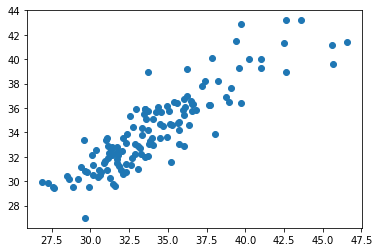

In [113]:
plt.scatter(target[:,-1],pred[:,-1])
plt.show

In [114]:
# plt.figure(figsize=(10,10))

# X=savgol_filter(target[:,-1], 81, 3)

# Y=savgol_filter(pred[:,-1], 81, 3)
# plt.plot(X,label="Measured Waist")
# plt.plot(Y,label="Predicted Waist")
# plt.legend()
# plt.show()

In [122]:
set=[]
set.append(target[:,-1].tolist())
set.append(pred[:,-1].tolist())
set.append(data[pants_size].tolist())
print(len(set[1]))

132


In [118]:
df = pd.DataFrame (set).transpose()
df.columns = ['Target', 'Predicted','Reported']
df.head()





,Target,Predicted
0,31.141732,31.909692
1,39.566929,39.241480
2,34.251969,35.661131
3,40.236220,40.042686
4,33.740157,32.037171


<AxesSubplot:xlabel='Target', ylabel='Predicted'>

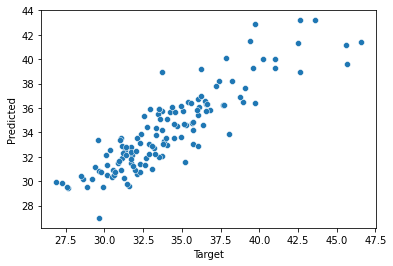

In [117]:
sns.scatterplot(data=df, x="Target", y="Predicted")